In [2]:
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np

In [31]:
image = cv2.imread("data/base.PNG")
masks = [
    cv2.imread("data/20_rgb_mask.png"),
    cv2.imread("data/50_rgb_mask.png"),
    cv2.imread("data/full_rgb_mask.png"),
]



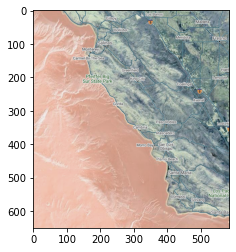

In [67]:
plt.imshow(image)

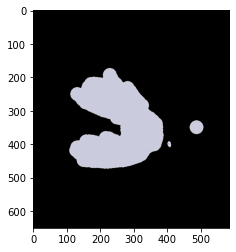

In [68]:
plt.imshow(masks[-1])

In [101]:
dst = cv2.addWeighted(masks[-1], 0.2, image, 1.0, 0)

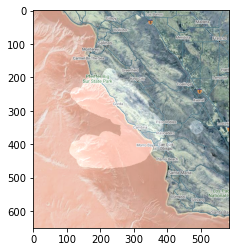

In [102]:
plt.imshow(dst)

In [149]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageChops

def autocrop(image, threshold=0):
    """Crops any edges below or equal to threshold

    Crops blank image to 1x1.

    Returns cropped image.

    """
    if len(image.shape) == 3:
        flatImage = np.max(image, 2)
    else:
        flatImage = image
    assert len(flatImage.shape) == 2

    rows = np.where(np.max(flatImage, 0) > threshold)[0]
    if rows.size:
        cols = np.where(np.max(flatImage, 1) > threshold)[0]
        return cols, rows
    else:
        return None, None



def image_change(image, old_image):
    im1 = Image.fromarray(image)
    im2 = Image.fromarray(old_image)
    diff = ImageChops.difference(im2, im1)
    
    cols, rows = autocrop(np.array(diff))
    
    return cv2.rectangle(image.copy(), (rows[0] , cols[0]), (rows[-1] + 1, cols[-1] + 1), (0, 255, 0), 2)
    

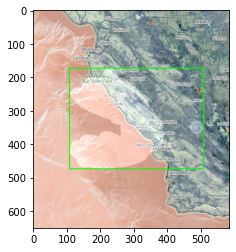

In [150]:
plt.imshow(image_change(dst, image))

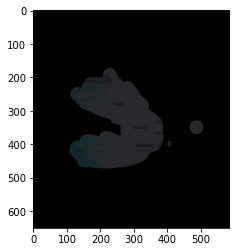

In [123]:
from PIL import Image, ImageChops
im1 = Image.fromarray(image)
im2 = Image.fromarray(dst)
diff = ImageChops.difference(im2, im1)

cols, rows = autocrop(np.array(diff))


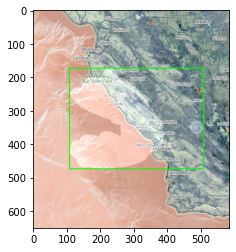

In [137]:
plt.imshow(
    cv2.rectangle(dst.copy(), (rows[0] , cols[0]), (rows[-1] + 1, cols[-1] + 1), (0, 255, 0), 2)
)

In [134]:
cols[0], cols[-1]+1

(173, 473)

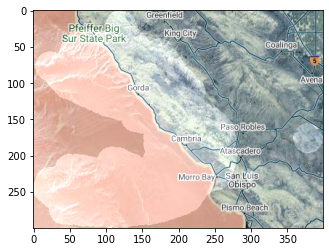

In [129]:
 = _
plt.imshow(dst[cols[0]: cols[-1] + 1, rows[0]: rows[-1] + 1])

In [118]:
diff = np.array(diff)
np.where(diff != 0)

(array([173, 173, 173, ..., 472, 472, 472]),
 array([225, 225, 225, ..., 225, 225, 225]),
 array([0, 1, 2, ..., 0, 1, 2]))

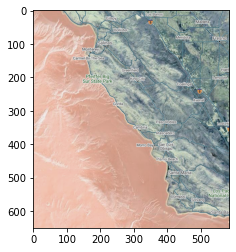

In [106]:
plt.imshow(image)

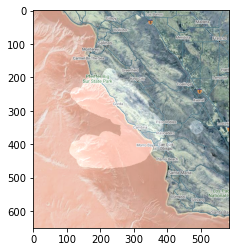

In [107]:
plt.imshow(dst)

In [34]:
np.array(diff).shape[:-1]

(650, 586)